In [132]:
import pandas as pd

In [133]:
orders_df = pd.read_csv("C://Users//User//OneDrive - Georgia Institute of Technology//Desktop//Data Analyst Learning//Python Project//Restaurant+Orders+CSV//order_details.csv", parse_dates=["order_time"])
orders_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9220\914032931.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders_df = pd.read_csv("C://Users//User//OneDrive - Georgia Institute of Technology//Desktop//Data Analyst Learning//Python Project//Restaurant+Orders+CSV//order_details.csv", parse_dates=["order_time"])


,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,2024-12-21 11:38:36,109.0
1,2,2,1/1/23,2024-12-21 11:57:40,108.0
2,3,2,1/1/23,2024-12-21 11:57:40,124.0
3,4,2,1/1/23,2024-12-21 11:57:40,117.0
4,5,2,1/1/23,2024-12-21 11:57:40,129.0


In [134]:
print(orders_df['order_time'].dtype)  # This should show 'datetime64[ns]'  

datetime64[ns]


In [135]:
# Create a new column with formatted date strings  
orders_df['formatted_order_time'] = orders_df['order_time'].dt.strftime('%Y-%m-%d %H:%M:%S')  

# Display the first few rows with the formatted dates  
print(orders_df[['order_time', 'formatted_order_time']].head())



           order_time formatted_order_time
0 2024-12-21 11:38:36  2024-12-21 11:38:36
1 2024-12-21 11:57:40  2024-12-21 11:57:40
2 2024-12-21 11:57:40  2024-12-21 11:57:40
3 2024-12-21 11:57:40  2024-12-21 11:57:40
4 2024-12-21 11:57:40  2024-12-21 11:57:40


In [136]:
# Print 'order_time' in a specific format  
print(orders_df['order_time'].dt.strftime('%Y-%m-%d %H:%M:%S'))

0        2024-12-21 11:38:36
1        2024-12-21 11:57:40
2        2024-12-21 11:57:40
3        2024-12-21 11:57:40
4        2024-12-21 11:57:40
                ...         
12229    2024-12-21 22:05:04
12230    2024-12-21 22:05:04
12231    2024-12-21 22:05:04
12232    2024-12-21 22:05:04
12233    2024-12-21 22:15:48
Name: order_time, Length: 12234, dtype: object


In [137]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_details_id      12234 non-null  int64         
 1   order_id              12234 non-null  int64         
 2   order_date            12234 non-null  object        
 3   order_time            12234 non-null  datetime64[ns]
 4   item_id               12097 non-null  float64       
 5   formatted_order_time  12234 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 573.6+ KB


CLEANING UP MISSING ROWS

In [138]:
orders_df = orders_df.dropna()

Joining Menu Items 

In [139]:
menu_orders_df = pd.read_csv("C:/Users/User/OneDrive - Georgia Institute of Technology/Desktop/Data Analyst Learning/Python Project/Restaurant+Orders+CSV/menu_items.csv")

menu_orders_df.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [140]:
menu_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [141]:
order_items_df = pd.merge(orders_df, menu_orders_df, left_on= 'item_id', right_on='menu_item_id', how='left')  

print(order_items_df)  

order_items_df["menu_item_id"].isna().sum()

       order_details_id  order_id order_date          order_time  item_id  \
0                     1         1     1/1/23 2024-12-21 11:38:36    109.0   
1                     2         2     1/1/23 2024-12-21 11:57:40    108.0   
2                     3         2     1/1/23 2024-12-21 11:57:40    124.0   
3                     4         2     1/1/23 2024-12-21 11:57:40    117.0   
4                     5         2     1/1/23 2024-12-21 11:57:40    129.0   
...                 ...       ...        ...                 ...      ...   
12092             12230      5369    3/31/23 2024-12-21 22:05:04    109.0   
12093             12231      5369    3/31/23 2024-12-21 22:05:04    129.0   
12094             12232      5369    3/31/23 2024-12-21 22:05:04    120.0   
12095             12233      5369    3/31/23 2024-12-21 22:05:04    122.0   
12096             12234      5370    3/31/23 2024-12-21 22:15:48    122.0   

      formatted_order_time  menu_item_id         item_name category  price 

0

In [142]:
#checking matched rows
matched_rows = order_items_df[order_items_df['menu_item_id'].notnull()]  
num_matched = matched_rows.shape[0]  

print(f'Total rows matched: {num_matched}')  


Total rows matched: 12097


***Adding TAX & Total Revenue columns***

In [143]:
order_items_df["sales_tax"] = order_items_df.price * .08
order_items_df["total_revenue"] = order_items_df.price + order_items_df["sales_tax"]
order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,formatted_order_time,menu_item_id,item_name,category,price,sales_tax,total_revenue
0,1,1,1/1/23,2024-12-21 11:38:36,109.0,2024-12-21 11:38:36,109,Korean Beef Bowl,Asian,17.95,1.436,19.386
1,2,2,1/1/23,2024-12-21 11:57:40,108.0,2024-12-21 11:57:40,108,Tofu Pad Thai,Asian,14.50,1.160,15.660
2,3,2,1/1/23,2024-12-21 11:57:40,124.0,2024-12-21 11:57:40,124,Spaghetti,Italian,14.50,1.160,15.660
3,4,2,1/1/23,2024-12-21 11:57:40,117.0,2024-12-21 11:57:40,117,Chicken Burrito,Mexican,12.95,1.036,13.986
4,5,2,1/1/23,2024-12-21 11:57:40,129.0,2024-12-21 11:57:40,129,Mushroom Ravioli,Italian,15.50,1.240,16.740


In [144]:
order_items_df.describe()

,order_details_id,order_id,order_time,item_id,menu_item_id,price,sales_tax,total_revenue
count,12097.000000,12097.000000,12097,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000
mean,6118.950897,2692.569149,2024-12-21 16:22:19.455071744,115.202282,115.202282,13.161767,1.052941,14.214709
min,1.000000,1.000000,2024-12-21 10:50:46,101.000000,101.000000,5.000000,0.400000,5.400000
25%,3064.000000,1353.000000,2024-12-21 13:26:19,107.000000,107.000000,10.500000,0.840000,11.340000
50%,6119.000000,2711.000000,2024-12-21 16:30:20,114.000000,114.000000,13.950000,1.116000,15.066000
75%,9175.000000,4020.000000,2024-12-21 18:52:11,123.000000,123.000000,16.500000,1.320000,17.820000
max,12234.000000,5370.000000,2024-12-21 23:05:24,132.000000,132.000000,19.950000,1.596000,21.546000
std,3531.337208,1545.826452,NaN,9.387580,9.387580,3.986392,0.318911,4.305303


**Analyzing BEST & WORST SELLING ITEMS**

<Axes: xlabel='item_name'>

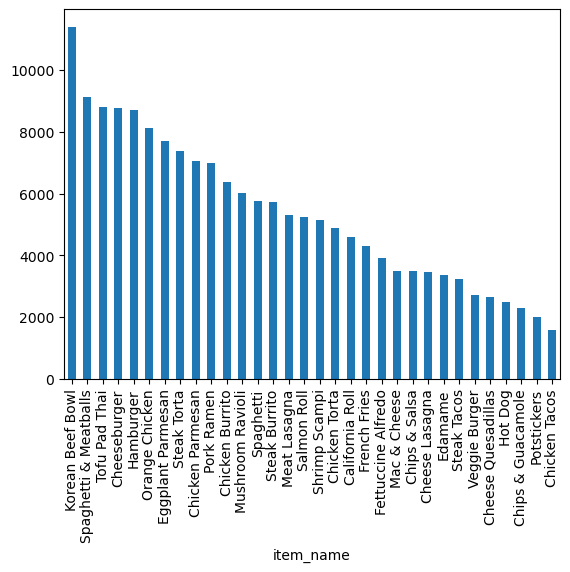

In [145]:
(order_items_df
 .groupby("item_name")
 ['total_revenue']
 .sum()
 .sort_values(ascending = False)
 .plot(kind='bar'))

<Axes: xlabel='item_name'>

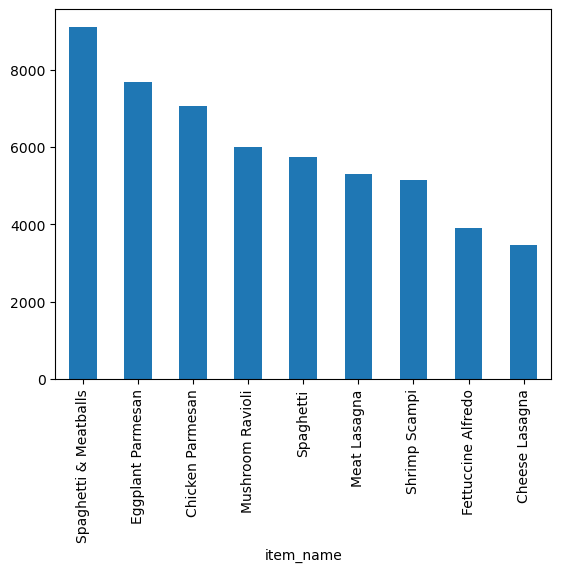

In [146]:
(order_items_df
 .query("category == 'Italian'")
 .groupby("item_name")
 ['total_revenue']
 .sum()
 .sort_values(ascending = False)
 .plot(kind='bar'))

***Analyzing Busiest Time***

In [147]:
print(order_items_df['order_time'].min())  
print(order_items_df['order_time'].max())

2024-12-21 10:50:46
2024-12-21 23:05:24


C:\Users\User\AppData\Local\Temp\ipykernel_9220\2403098402.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  order_items_df.set_index('order_time').resample('H')['total_revenue'].sum().plot()


<Axes: xlabel='order_time'>

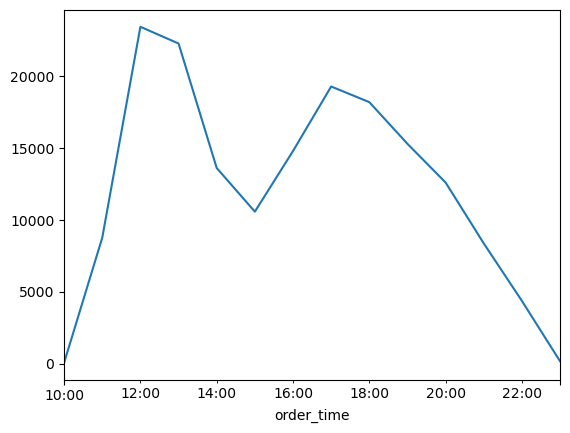

In [148]:
order_items_df.set_index('order_time').resample('H')['total_revenue'].sum().plot()

In [149]:
order_items_df['day_of_week'] = order_items_df.order_time.dt.dayofweek

order_items_df['hour_of_week'] = order_items_df.order_time.dt.hour


In [150]:
order_items_df.tail()

,order_details_id,order_id,order_date,order_time,item_id,formatted_order_time,menu_item_id,item_name,category,price,sales_tax,total_revenue,day_of_week,hour_of_week
12092,12230,5369,3/31/23,2024-12-21 22:05:04,109.0,2024-12-21 22:05:04,109,Korean Beef Bowl,Asian,17.95,1.436,19.386,5,22
12093,12231,5369,3/31/23,2024-12-21 22:05:04,129.0,2024-12-21 22:05:04,129,Mushroom Ravioli,Italian,15.50,1.240,16.740,5,22
12094,12232,5369,3/31/23,2024-12-21 22:05:04,120.0,2024-12-21 22:05:04,120,Steak Torta,Mexican,13.95,1.116,15.066,5,22
12095,12233,5369,3/31/23,2024-12-21 22:05:04,122.0,2024-12-21 22:05:04,122,Chips & Salsa,Mexican,7.00,0.560,7.560,5,22
12096,12234,5370,3/31/23,2024-12-21 22:15:48,122.0,2024-12-21 22:15:48,122,Chips & Salsa,Mexican,7.00,0.560,7.560,5,22


In [161]:
import pandas as pd  

# Example: Load your DataFrame (assuming order_items_df is already loaded)  
# Example loading DataFrame:  
# order_items_df = pd.read_csv("your_file.csv")  

# Convert 'order_date' to datetime if it's not already  
order_items_df['order_date'] = pd.to_datetime(order_items_df['order_date'], format='%Y-%m-%d', errors='coerce')  

# Check if the conversion worked and handle any NaT values if necessary  
if order_items_df['order_date'].isnull().any():  
    print("There are invalid dates in 'order_date'. Please check the data.")  
else:  
    # Format the order_date as yyyy-mm-dd (this is mainly for display)  
    order_items_df['formatted_order_date'] = order_items_df['order_date'].dt.strftime('%Y-%m-%d')  

    # Extract the day of the week (0=Monday, 6=Sunday)  
    order_items_df['day_of_week'] = order_items_df['order_date'].dt.dayofweek  # Gets day of week  

    # Optional: Get day name (e.g., 'Monday', 'Tuesday', etc.)  
    order_items_df['day_name'] = order_items_df['order_date'].dt.day_name()  

    # Display the updated DataFrame  
    print(order_items_df[['formatted_order_date', 'day_of_week', 'day_name']].head())

  formatted_order_date  day_of_week day_name
0           2023-01-01            6   Sunday
1           2023-01-01            6   Sunday
2           2023-01-01            6   Sunday
3           2023-01-01            6   Sunday
4           2023-01-01            6   Sunday


In [167]:
import pandas as pd  

# Example: Load your DataFrame  
# order_items_df = pd.read_csv("your_file.csv", parse_dates=["order_date"])  

# Ensure 'order_date' is in datetime format, if not already  
order_items_df['order_date'] = pd.to_datetime(order_items_df['order_date'], errors='coerce')  

# 1. Get unique dates  
unique_dates = order_items_df['order_date'].unique()  

# 2. Convert to a list if needed  
unique_dates_list = unique_dates.tolist()  

# 3. Sort the unique dates (optional)  
sorted_unique_dates = sorted(unique_dates_list)  

# Print the results  
print("Unique dates:", sorted_unique_dates)

Unique dates: [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-16 00:00:00'), Timestamp('2023-01-17 00:00:00'), Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-28 00:00:00'), Timestamp('2023-01-29 00:00:00'),

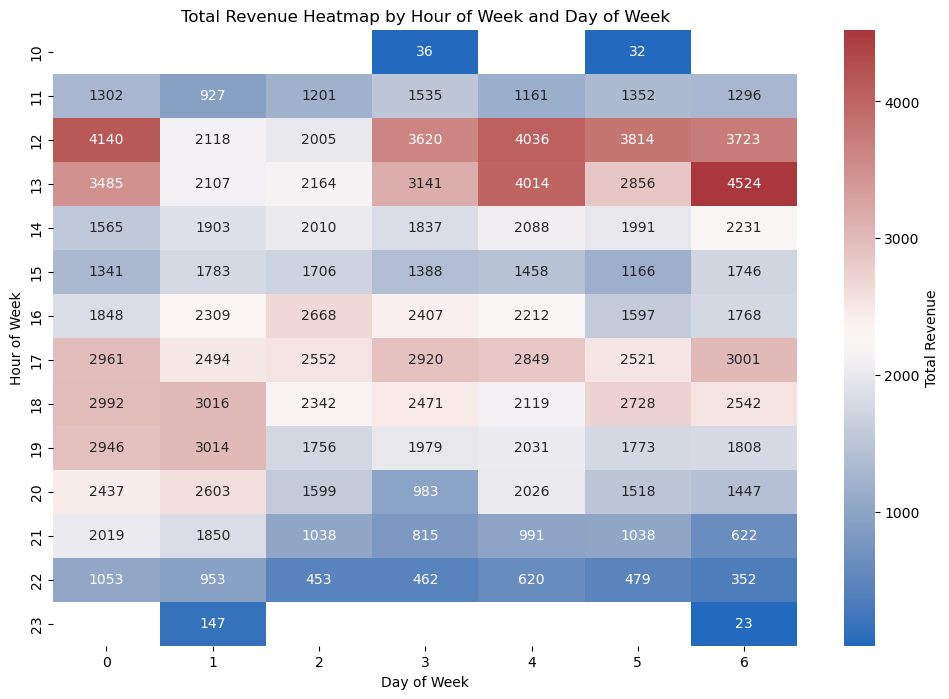

In [172]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Assuming order_items_df is your DataFrame  
# Create the pivot table  
heatmap_data = order_items_df.pivot_table(  
    index='hour_of_week',   
    columns='day_of_week',  
    values='total_revenue',  
    aggfunc='sum'  
)  

# Round the values in the heatmap data, e.g., rounding to 0 decimal places  
heatmap_data_rounded = np.round(heatmap_data)  

# Create the heatmap  
plt.figure(figsize=(12, 8))  # Set the size of the heatmap  
sns.heatmap(  
    heatmap_data_rounded,     # Use the rounded data for the heatmap  
    annot=heatmap_data_rounded,  # Annotate with rounded values  
    fmt='.0f',                # Format the annotations as integers  
    cmap='vlag',              # Use the 'vlag' colormap  
    cbar_kws={'label': 'Total Revenue'}  # Optional: label for the color bar  
)  

# Add labels and title for better readability  
plt.title("Total Revenue Heatmap by Hour of Week and Day of Week")  
plt.xlabel("Day of Week")  
plt.ylabel("Hour of Week")  

# Show the heatmap  
plt.show()